In [104]:
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

import rasterio
from rasterio.transform import from_origin
from tqdm import tnrange, tqdm_notebook
from sentinelhub import WmsRequest, WcsRequest, MimeType, CRS, BBox, constants
from scipy.ndimage import median_filter
from skimage.transform import resize
import pandas as pd

In [105]:
data = pd.read_csv("../../data/project-val/ghana-val.csv")
data = data.drop('IMAGERY_TITLE', axis = 1)
data =data.dropna(axis = 0)
data.shape

(34300, 10)

In [106]:
lon = data['LON']
lat = data['LAT']
label = data['TREE']
plot_ids = sorted(list(data['PLOT_ID'].unique()))

In [107]:
y_size = len(lat.unique())
x_size = len(lon.unique())
print(y_size, x_size)


299 105


In [108]:
possible_ys = sorted(lat.unique())
possible_xs = sorted(lon.unique())

In [109]:
arr = np.empty((y_size, x_size))

In [110]:
arr.shape

(299, 105)

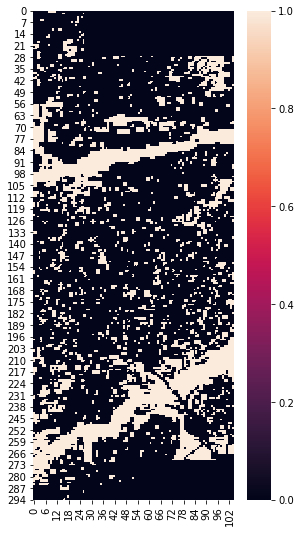

In [111]:
finished = []
for x, y, tree in zip(lon, lat, label):
    x_id = possible_xs.index(x)
    y_id = possible_ys.index(y)
    if (x, y) not in finished:
        arr[y_id, x_id] = np.min([tree, 1])
        finished.append((x, y))
plt.figure(figsize=(4.5, 9))
sns.heatmap(np.flipud(arr[:, :]))

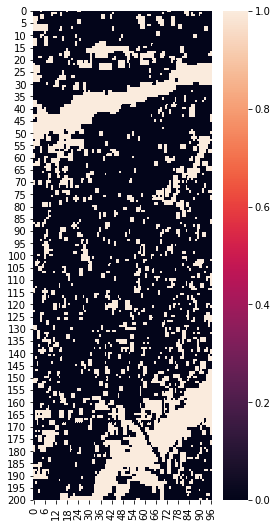

In [112]:
plt.figure(figsize=(4, 9))
sns.heatmap(np.flipud(arr[44:-50, 8:]))

In [114]:
arr[44:-50, 8:].shape

(205, 97)

In [115]:
to_save = np.flipud(arr[49:-50, 8:])

np.save("../../data/ghana-val.npy", to_save)

In [199]:
l = 0
for i in plot_ids:
    print(np.sum(reconstruct_images(i)), l)
    l += 1

159.0 0
184.0 1
196.0 2
196.0 3
196.0 4
193.0 5
157.0 6
150.0 7
39.0 8
67.0 9
157.0 10
142.0 11
68.0 12
182.0 13
145.0 14
154.0 15
174.0 16
182.0 17
128.0 18
126.0 19
131.0 20
178.0 21
186.0 22
196.0 23
196.0 24
111.0 25
24.0 26
42.0 27
139.0 28
143.0 29
156.0 30
183.0 31
196.0 32
165.0 33
192.0 34
150.0 35
181.0 36
184.0 37
153.0 38
141.0 39
169.0 40
157.0 41
179.0 42
179.0 43
196.0 44
75.0 45
46.0 46
137.0 47
173.0 48
196.0 49
182.0 50
162.0 51
168.0 52
121.0 53
104.0 54
141.0 55
129.0 56
167.0 57
143.0 58
141.0 59
140.0 60
112.0 61
126.0 62
120.0 63
133.0 64
187.0 65
182.0 66
161.0 67
171.0 68
143.0 69
116.0 70
138.0 71
160.0 72
114.0 73
126.0 74
0.0 75
156.0 76
131.0 77
185.0 78
177.0 79
117.0 80
81.0 81
101.0 82
134.0 83
152.0 84
139.0 85
179.0 86
175.0 87
115.0 88
108.0 89
179.0 90
108.0 91
106.0 92
186.0 93
92.0 94
136.0 95
163.0 96
170.0 97
135.0 98
46.0 99
74.0 100
162.0 101
117.0 102
71.0 103
17.0 104
44.0 105
135.0 106
185.0 107
147.0 108
113.0 109
73.0 110
140.0 111
196.0 1

0 18
18 36
36 54
54 72
72 90
(252, 14)
(252, 14)
(252, 14)
(252, 14)
(252, 14)
(252, 70)


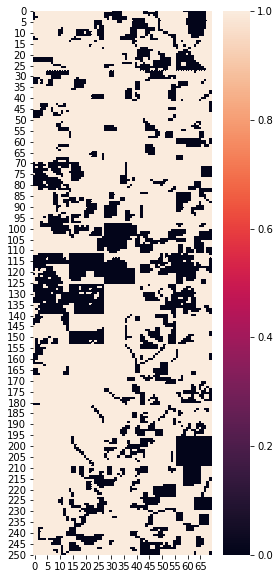

In [203]:
alls = []
for xs in range(0, 5):
    rows = []
    print(xs*18, (xs+1)*18)
    for i in plot_ids[xs*18:(xs+1)*18]:
        subs = np.array(reconstruct_images(i))
        if subs.shape == (14, 14):
            rows.append(subs[:, :])
        else:
            rows.append(np.zeros((14, 14)))
    rows = np.concatenate(rows)
    alls.append(rows)
for i in alls:
    print(i.shape)
stacked = np.concatenate(alls, axis = 1)
print(stacked.shape)
plt.figure(figsize=(4, 10))

sns.heatmap(np.flipud(stacked))

(266, 84)
(0, 0) 0 14 0 14
(1, 0) 14 28 0 14
(2, 0) 28 42 0 14
(3, 0) 42 56 0 14
(4, 0) 56 70 0 14
(5, 0) 70 84 0 14
(6, 0) 84 98 0 14
(7, 0) 98 112 0 14
(8, 0) 112 126 0 14
(9, 0) 126 140 0 14
(10, 0) 140 154 0 14
(11, 0) 154 168 0 14
(12, 0) 168 182 0 14
(13, 0) 182 196 0 14
(14, 0) 196 210 0 14
(15, 0) 210 224 0 14
(16, 0) 224 238 0 14
(17, 0) 238 252 0 14
(18, 0) 252 266 0 14
(0, 1) 0 14 14 28
(1, 1) 14 28 14 28
(2, 1) 28 42 14 28
(3, 1) 42 56 14 28
(4, 1) 56 70 14 28
(5, 1) 70 84 14 28
(6, 1) 84 98 14 28
(7, 1) 98 112 14 28
(8, 1) 112 126 14 28
(9, 1) 126 140 14 28
(10, 1) 140 154 14 28
(11, 1) 154 168 14 28
(12, 1) 168 182 14 28
(13, 1) 182 196 14 28
(14, 1) 196 210 14 28
(15, 1) 210 224 14 28
(16, 1) 224 238 14 28
(17, 1) 238 252 14 28
(18, 1) 252 266 14 28
(0, 2) 0 14 28 42
(1, 2) 14 28 28 42
(2, 2) 28 42 28 42
(3, 2) 42 56 28 42
(4, 2) 56 70 28 42
(5, 2) 70 84 28 42
(6, 2) 84 98 28 42
(7, 2) 98 112 28 42
(8, 2) 112 126 28 42
(9, 2) 126 140 28 42
(10, 2) 140 154 28 42
(11, 2) 1

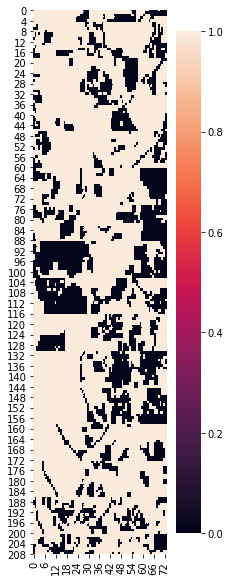

In [204]:
def reconstruct_images(plot_id):
    subs = data[data['PLOT_ID'] == plot_id]
    rows = []
    lats = reversed(sorted(subs['LAT'].unique()))
    for i, val in enumerate(lats):
        subs_lat = subs[subs['LAT'] == val]
        subs_lat = subs_lat.sort_values('LON', axis = 0)
        rows.append(list(subs_lat['TREE']))
    return rows


empt = np.empty((19*14, 6*14))
print(empt.shape)
grid_positions = []
for i, val in enumerate(plot_ids):
    grid_positions.append((i % 19, i // 19))
for i, pos in zip(plot_ids, grid_positions):
    subs = np.array(reconstruct_images(i))
    if subs.shape == (14, 14):
        print(pos, pos[0]*14, pos[0]*14 + 14, pos[1]*14, pos[1]*14+14)
        empt[pos[0]*14:pos[0]*14 + 14, pos[1]*14:pos[1]*14+14] = subs
    
plt.figure(figsize=(3, 10))
empt[np.where(empt > 1)] = 1.
empt[np.where(empt < 0)] = 0.
sns.heatmap(np.flipud(empt)[51:-4, 10:])

In [ ]:
plt.figure(figsize=(3, 10))
arr[np.where(arr > 1)] = 1.
arr[np.where(arr < 0)] = 0.
sns.heatmap(np.flipud(arr)[51:-4, 10:])